# Técnicas de Machine Learning para Classificação Supervisionada de Contas Bots do Twitter.

## FIA LABDATA - Turma 13

### Fabio Daleffi

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_accounts = pd.read_csv('classified_twitter_accounts.csv')

In [4]:
df_accounts.shape

(14368, 25)

In [5]:
# DROP VARIAVEIS ALTA CARDINALIDADE
df_accounts.drop(['id','name', 'screen_name'], inplace=True, axis=1)

# DROP VARIAVEIS CONSTRUIDAS
construidas = [
'screen_name_total_len',  
'screen_name_num_len',       
'name_total_len',            
'name_num_len',              
'is_url_null',               
'is_location_null',          
'profile_banner_url_null',   
'profile_image_url_null',    
'description_null'] 


df_accounts.drop(construidas, inplace=True, axis=1) 

df_accounts.shape

(14368, 13)

In [6]:
# checar o s tipos
df_accounts.dtypes

statuses_count            int64
followers_count           int64
friends_count             int64
favourites_count          int64
listed_count              int64
lang                     object
default_profile            bool
default_profile_image      bool
geo_enabled                bool
protected                  bool
verified                   bool
classification           object
dataset                  object
dtype: object

In [7]:
# CHECAR SE HA MISSING
df_accounts.isnull().sum()

statuses_count           0
followers_count          0
friends_count            0
favourites_count         0
listed_count             0
lang                     0
default_profile          0
default_profile_image    0
geo_enabled              0
protected                0
verified                 0
classification           0
dataset                  0
dtype: int64

In [8]:
# Checar variaveis quantitativas
df_accounts.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count
count,14368.000000,1.436800e+04,14368.000000,14368.000000,14368.000000
mean,5063.190910,8.682774e+02,589.318834,1145.288280,11.173998
std,17493.409898,2.688472e+04,2665.832959,6036.894173,266.966297
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,31.000000,6.000000e+00,42.000000,0.000000,0.000000
50%,63.000000,2.500000e+01,250.000000,0.000000,0.000000
75%,1365.250000,3.320000e+02,538.000000,9.000000,3.000000
max,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000


Não há missing values nem valores fora da distribuição esperada

In [19]:
df_accounts.followers_count.std()

26884.723590891856

In [11]:
# separando variaveis quantitativas
quanti_vars = df_accounts.describe().columns

In [12]:
# converter variaveis boolean para categorica
bool_vars = df_accounts.select_dtypes('bool').columns
df_accounts[bool_vars] = df_accounts[bool_vars].astype('object')

In [13]:
# Categorizando idioma
df_accounts['lang_cat'] = np.where(df_accounts.lang == 'en', 'English', 'Others')

In [14]:
# separando variaveis categoricas
cat_vars = df_accounts.select_dtypes('object').columns

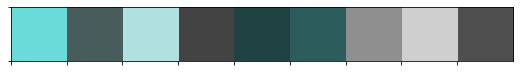

In [15]:
# configurando paleta de cores identidade visual FIA
palette = ['#6ADBD9','#485C5B','#B0E1E0', '#434343','#204242','#2C5C5B', '#8F8F8F', '#CFCFCF','#4F4F4F']

sns.set_palette(palette)

current_palette = sns.color_palette()
sns.palplot(current_palette)

# Análsie Univariada

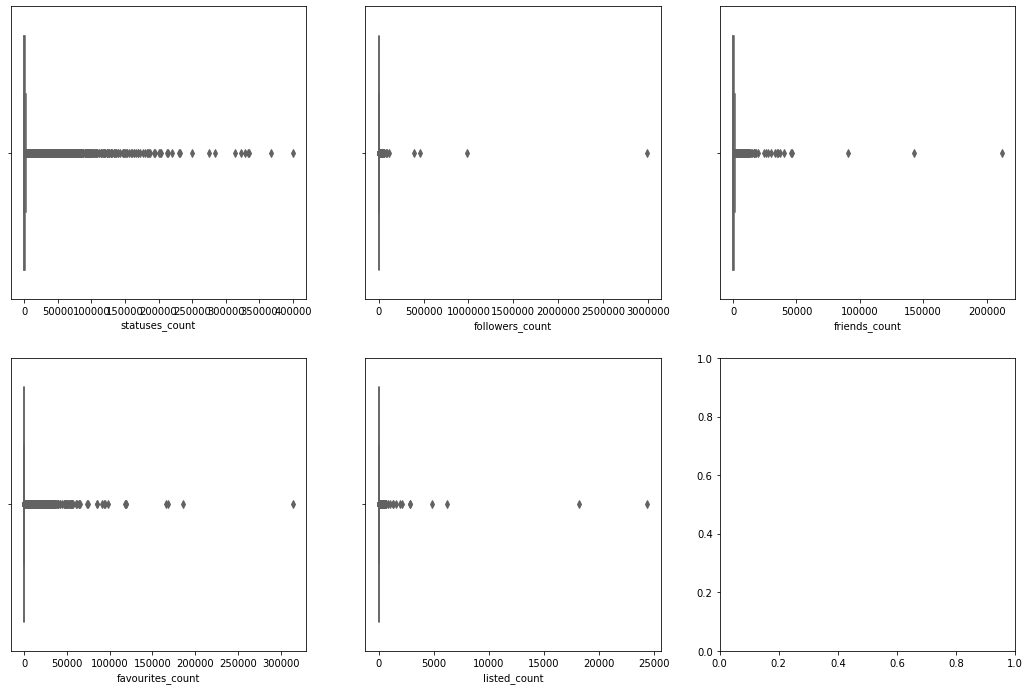

In [16]:
fig, axs = plt.subplots(ncols=3, figsize=(18,10), nrows=2, )
plt.subplots_adjust(bottom=0.005, top = 0.9)

sns.boxplot(df_accounts.statuses_count,           ax=axs[0,0])
sns.boxplot(df_accounts.followers_count,          ax=axs[0,1])
sns.boxplot(df_accounts.friends_count,            ax=axs[0,2])
sns.boxplot(df_accounts.favourites_count,         ax=axs[1,0])
sns.boxplot(df_accounts.listed_count,             ax=axs[1,1])


Todas as variávei continuas possuem outliers

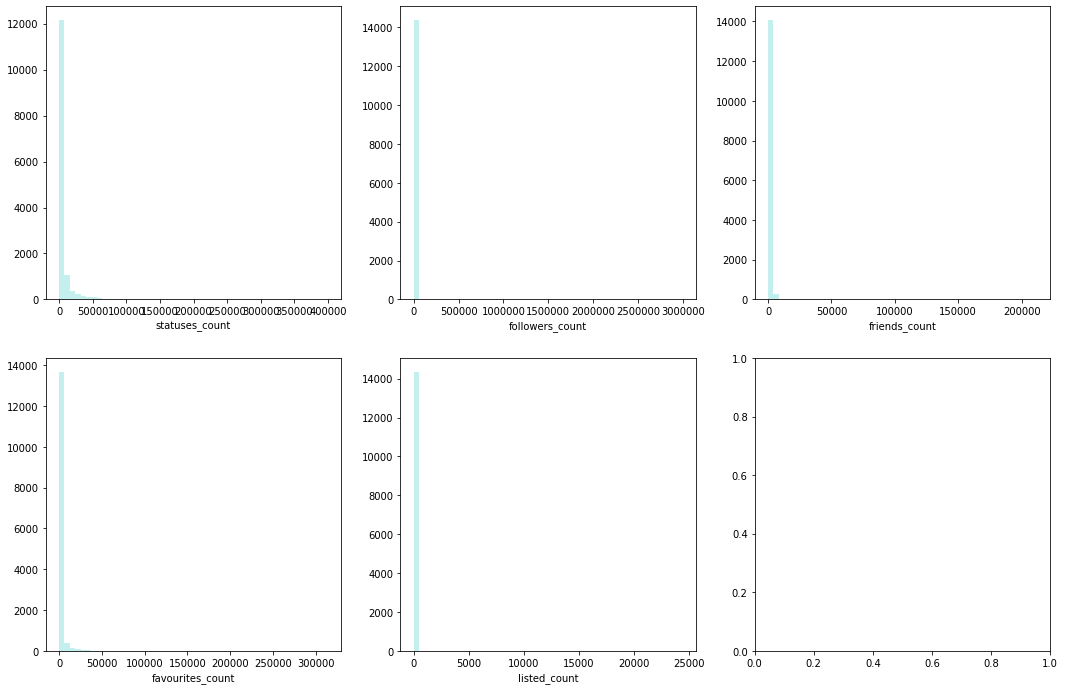

In [17]:
fig, axs = plt.subplots(ncols=3, figsize=(18,10), nrows=2, )
plt.subplots_adjust(bottom=0.005, top = 0.9)

sns.distplot(df_accounts.statuses_count,           ax=axs[0,0], kde=False)
sns.distplot(df_accounts.followers_count,          ax=axs[0,1], kde=False)
sns.distplot(df_accounts.friends_count,            ax=axs[0,2], kde=False)
sns.distplot(df_accounts.favourites_count,         ax=axs[1,0], kde=False)
sns.distplot(df_accounts.listed_count,             ax=axs[1,1], kde=False)


Os dados não possuem distribuição normal

In [130]:
df_accounts.classification.value_counts(normalize=True)

bot      0.758213
human    0.241787
Name: classification, dtype: float64

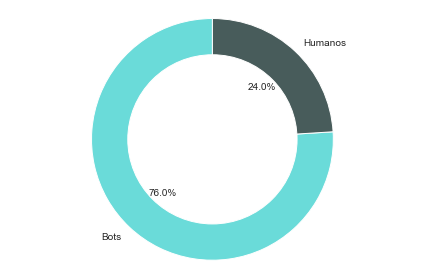

In [131]:
# Pie chart
labels = ['Bots', 'Humanos']
sizes = [76, 24]

#colors
colors = ['#6ADBD9','#485C5B']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

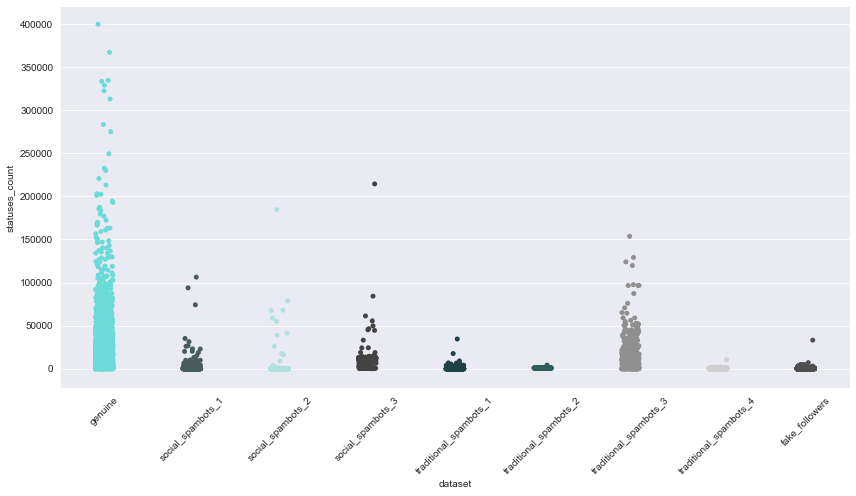

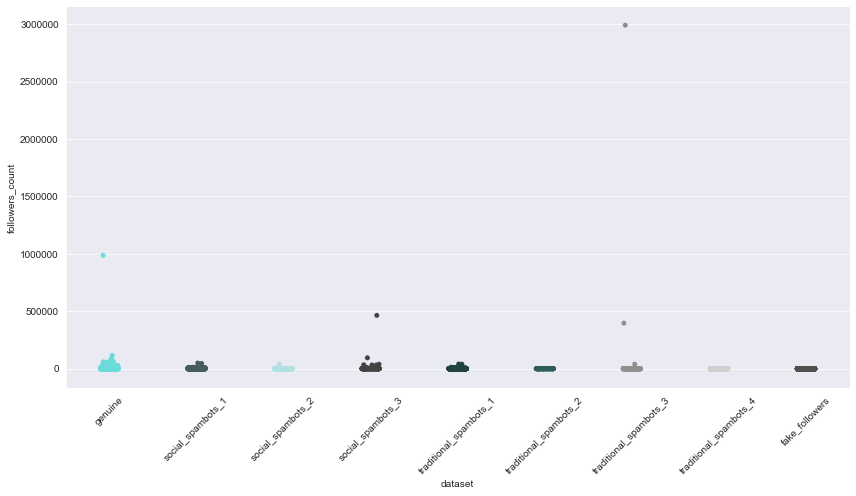

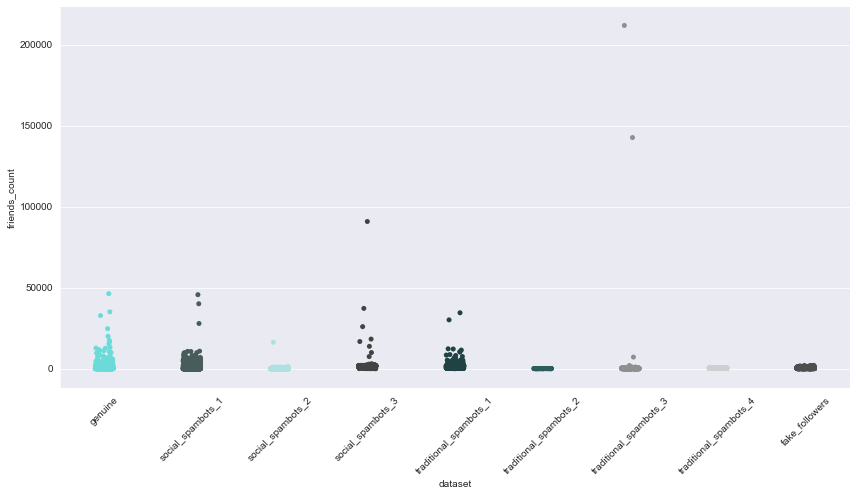

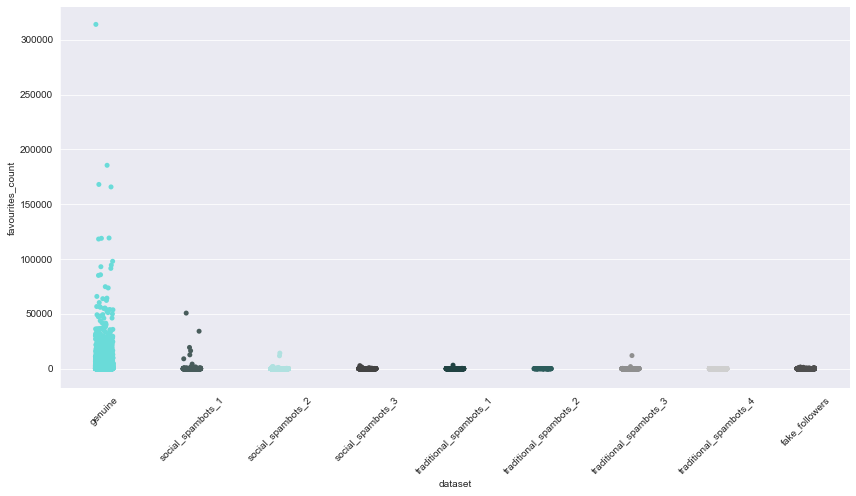

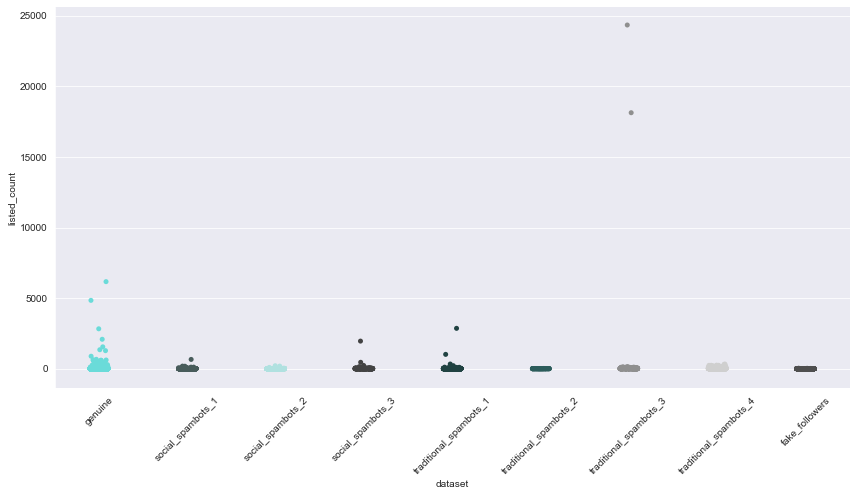

In [132]:
sns.set_style("darkgrid")

for var in quanti_vars:

    chart = sns.catplot(data=df_accounts, x='dataset', y=var, height=6, aspect=2)
    plt.xticks(rotation=45)
    plt.show()



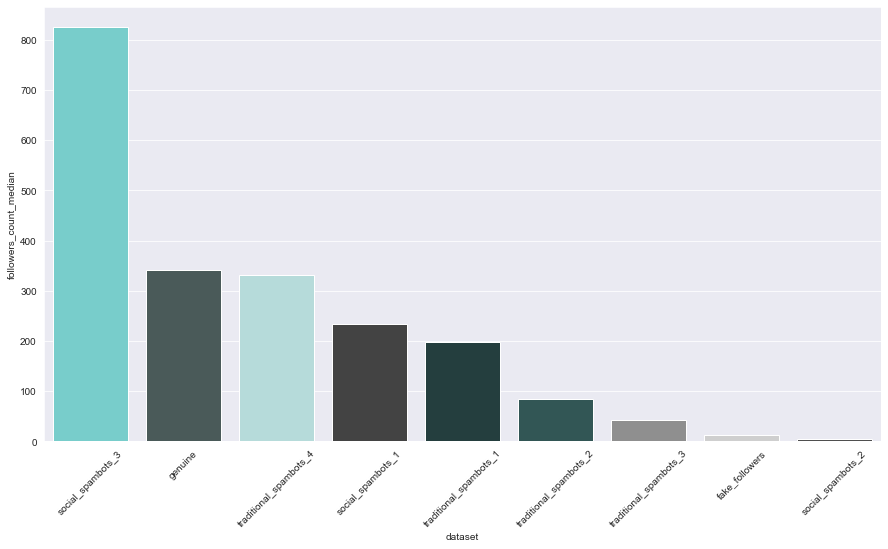

In [133]:
data = df_accounts.groupby('dataset').agg(followers_count_median=('followers_count', 'median')).reset_index().sort_values(by ='followers_count_median' , ascending=False)

fig, axs = plt.subplots(ncols=1, figsize=(15,8), nrows=1)
sns.set_style("darkgrid")
chart = sns.barplot(data=data, x='dataset', y='followers_count_median')
plt.xticks(rotation=45);

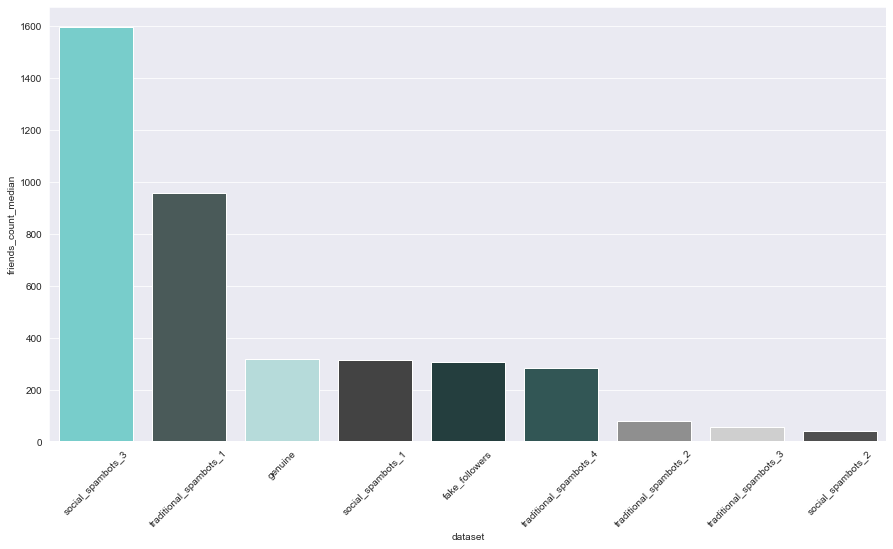

In [134]:
data = df_accounts.groupby('dataset').agg(friends_count_median=('friends_count', 'median')).reset_index().sort_values(by ='friends_count_median' , ascending=False)

fig, axs = plt.subplots(ncols=1, figsize=(15,8), nrows=1)
sns.set_style("darkgrid")
chart = sns.barplot(data=data, x='dataset', y='friends_count_median')
plt.xticks(rotation=45);

# Análise Bivariada

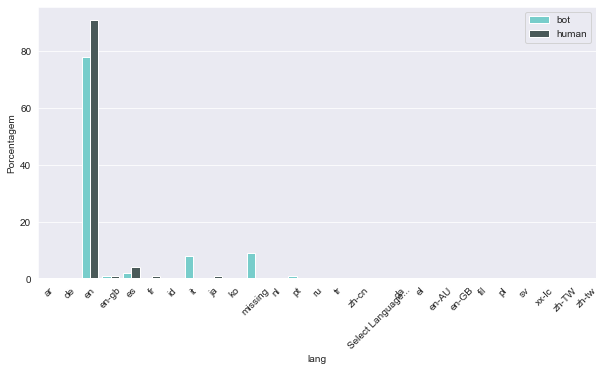

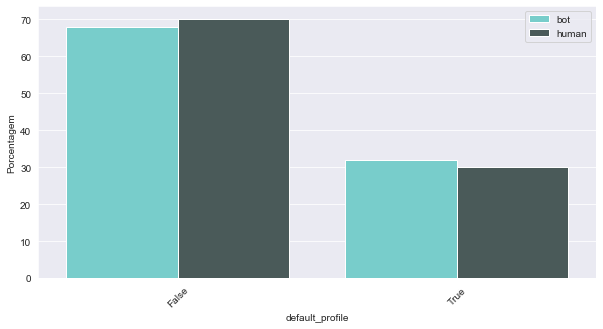

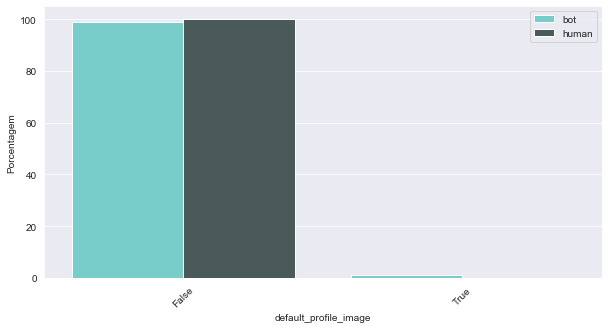

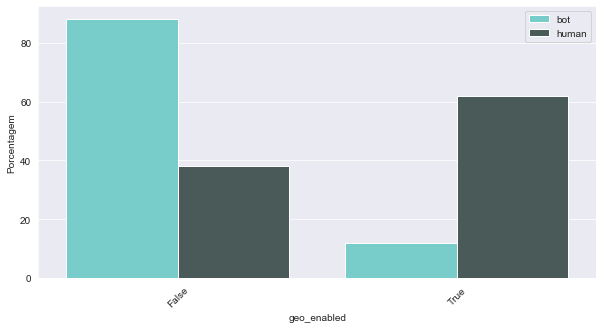

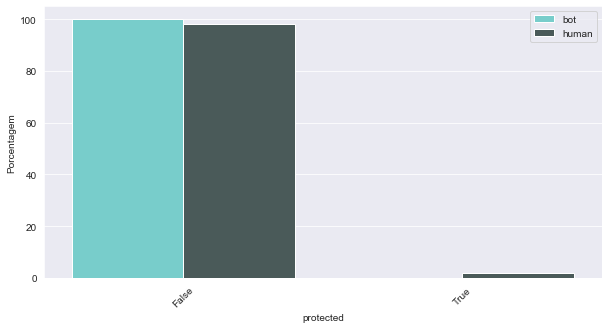

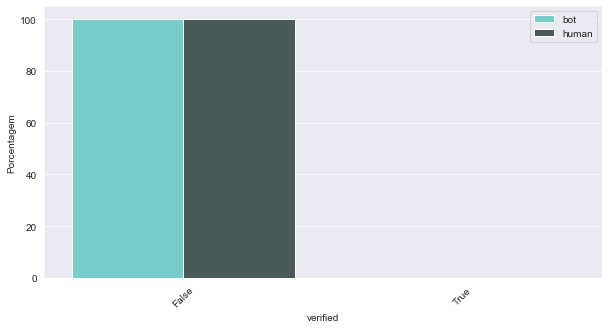

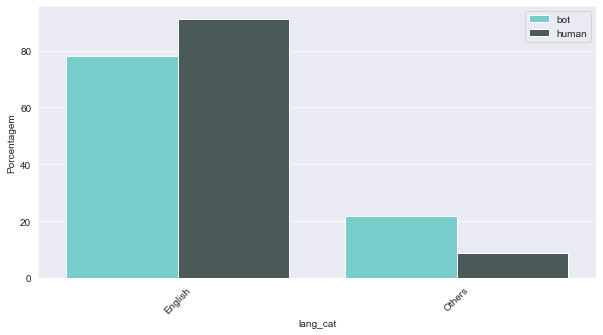

In [211]:
total_humano = df_accounts[df_accounts['classification'] == "human"].shape[0]
total_bot = df_accounts[df_accounts['classification'] == "bot"].shape[0]

for var in cat_vars:
    
    # nao plotar a classificacao
    if (var != 'classification' and var != 'dataset'):
        
        #prop human
        prop_human = (    
            df_accounts
                .where(df_accounts['classification' ]== 'human')
                .groupby([var, 'classification'])
                .agg(count = (var, 'count'))
                .assign(percent = lambda x: round((x['count'] / total_humano) * 100))
                .reset_index()
        )

        # prop Bot
        prop_bot = (
            df_accounts
                .where(df_accounts['classification' ]== 'bot')
                .groupby([var, 'classification'])
                .agg(count = (var, 'count'))
                .assign(percent = lambda x: round((x['count'] / total_bot) * 100))
                .reset_index()
        )

        prop = pd.concat([prop_bot, prop_human])

        fig, axs = plt.subplots(ncols=1, figsize=(10,5), nrows=1)
        chart = sns.barplot(data=prop, x= var, y = 'percent', hue='classification')
        chart.set(xlabel = var, ylabel='Porcentagem')
        chart.legend(loc='upper right');
        plt.xticks(rotation=45);
        plt.show()

In [154]:
# Investigando se protected e verified realmente não existem

print(df_accounts[df_accounts.protected == True].classification.value_counts())

print(df_accounts[df_accounts.verified == True].classification.value_counts())

human    78
Name: classification, dtype: int64
human    11
Name: classification, dtype: int64


In [217]:
 var = 'default_profile_image'
#prop human
prop_human = (    
    df_accounts
        .where(df_accounts['classification' ]== 'human')
        .groupby([var, 'classification'])
        .agg(count = (var, 'count'))
        .assign(percent = lambda x: (x['count'] / total_humano) * 100)
        .reset_index()
)

# prop Bot
prop_bot = (
    df_accounts
        .where(df_accounts['classification' ]== 'bot')
        .groupby([var, 'classification'])
        .agg(count = (var, 'count'))
        .assign(percent = lambda x: (x['count'] / total_bot) * 100)
        .reset_index()
)

prop = pd.concat([prop_bot, prop_human])
        
prop

,default_profile_image,classification,count,percent
0,False,bot,10829,99.403341
1,True,bot,65,0.596659
0,False,human,3461,99.625792
1,True,human,13,0.374208


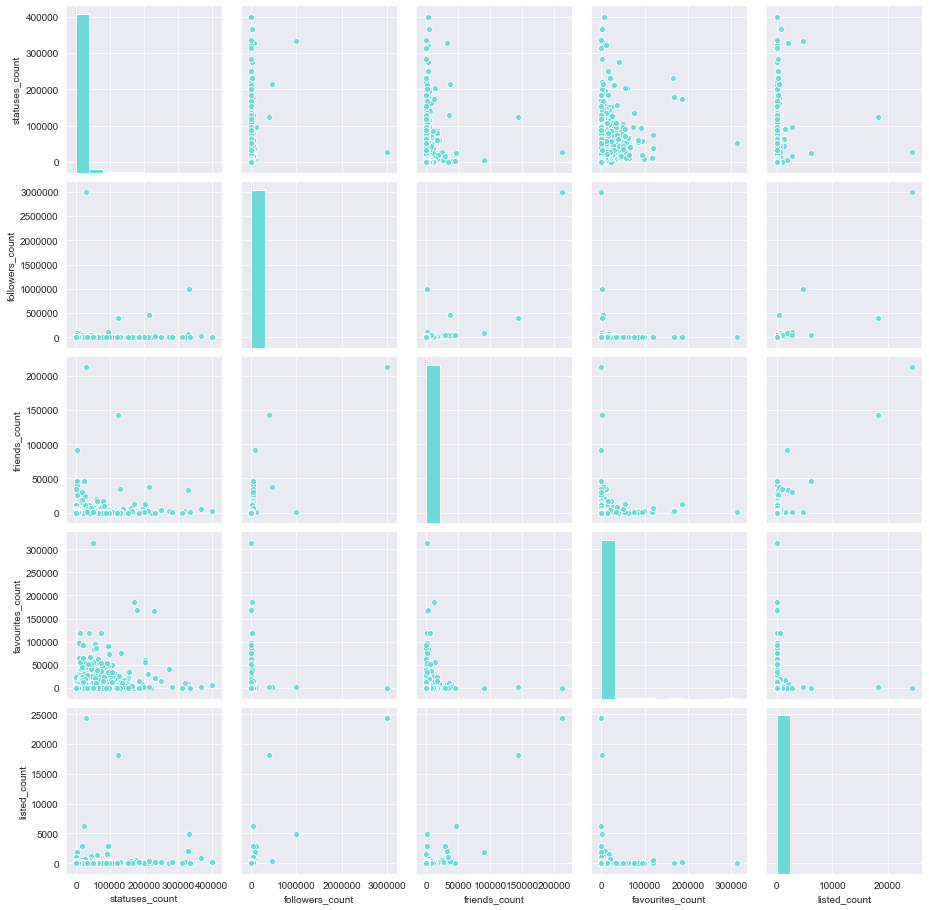

In [141]:
sns.pairplot(data=df_accounts[quanti_vars])

Aparentemente há correlação entre as variáveis "listed_count" e Followers / Friends counts

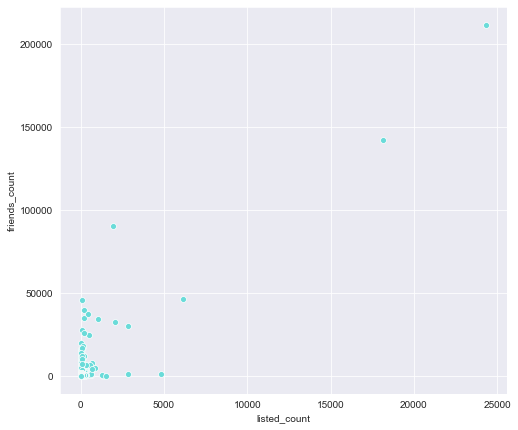

In [142]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6), nrows=1, )
plt.subplots_adjust(bottom=0.005, top = 0.9)

sns.set_style("darkgrid")
sns.scatterplot(data=df_accounts, x='listed_count', y='friends_count')
#sns.scatterplot(data=df_accounts, x='listed_count', y='followers_count', ax=axs[1])

# Value Information Factor Analysis (VIF)

In [34]:
# Checar multicolinearidade com o VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(dataframe):
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = dataframe.columns
    vif["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]

    return(vif)

In [35]:
df_accounts.dtypes

statuses_count            int64
followers_count           int64
friends_count             int64
favourites_count          int64
listed_count              int64
lang                     object
default_profile          object
default_profile_image    object
geo_enabled              object
protected                object
verified                 object
classification           object
dataset                  object
dtype: object

In [36]:
drop_list = ['lang', 'classification', 'dataset']
vif_df = df_accounts.drop(drop_list, axis=1).copy()

In [37]:
bool_columns = vif_df.select_dtypes('object').columns
vif_df[bool_columns] = df_accounts[bool_columns].astype('int32')

In [41]:
calc_vif(dataframe = vif_df).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,listed_count,5.223309
1,followers_count,3.444088
2,friends_count,3.289549
0,statuses_count,1.318961
3,favourites_count,1.240664
7,geo_enabled,1.170671
5,default_profile,1.053806
9,verified,1.033102
8,protected,1.010585
6,default_profile_image,1.002891


Confirmando que há correlação com a variável Listed Count pois seu VIF é maior que 5

In [31]:
multcolinearity = ['listed_count']

calc_vif(dataframe = vif_df.drop(multcolinearity, axis = 1)).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,friends_count,2.152890
1,followers_count,2.109569
0,statuses_count,1.318960
3,favourites_count,1.239544
6,geo_enabled,1.170306
4,default_profile,1.044332
8,verified,1.029699
7,protected,1.010493
5,default_profile_image,1.002889


# TEMP --> categorizar as quantis para mostrar a distribuições melhor

In [116]:
df_quanti = df_accounts[quanti_vars].copy()
df_quanti['cat_statuses_count'] = df_quanti['statuses_count']

In [121]:
df_quanti['cat_statuses_count'] = np.where(df_quanti["statuses_count"] <= 10000, 'ATE 10k', df_quanti['cat_statuses_count'])
df_quanti['cat_statuses_count'] = np.where((df_quanti["statuses_count"] > 10000) & (df_quanti["statuses_count"] <= 20000), 'ACIMA DE 10K ATE 20k',  df_quanti['cat_statuses_count'])
df_quanti['cat_statuses_count'] = np.where((df_quanti["statuses_count"] > 20000) & (df_quanti["statuses_count"] <= 30000), 'ACIMA DE 20K ATE 30k', df_quanti['cat_statuses_count'])
df_quanti['cat_statuses_count'] = np.where((df_quanti["statuses_count"] > 30000) & (df_quanti["statuses_count"] <= 40000), 'ACIMA DE 30K ATE 40k', df_quanti['cat_statuses_count'])
df_quanti['cat_statuses_count'] = np.where((df_quanti["statuses_count"] > 40000) & (df_quanti["statuses_count"] <= 50000), 'ACIMA DE 40K ATE 50k', df_quanti['cat_statuses_count'])
df_quanti['cat_statuses_count'] = np.where(df_quanti["statuses_count"] > 50000, 'ACIMA DE 50K', df_quanti['cat_statuses_count'])

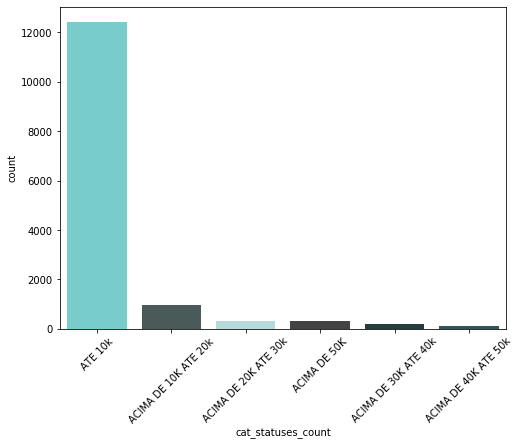

In [136]:
fig, axs = plt.subplots(ncols=1, figsize=(8,5), nrows=1, )
plt.subplots_adjust(bottom=0.005, top = 0.9)

sns.countplot(x = df_quanti.cat_statuses_count, order = df_quanti.cat_statuses_count.value_counts().index)
plt.xticks(rotation=45);
